In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
data = pd.read_csv("Datasets/heart-disease.csv")

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df = pd.read_csv("Datasets/IEA Global EV Data 2024.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [11]:
df.isnull().sum() 

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [12]:
data['chol'] = data['chol'].replace(np.nan, data['chol'].mean())

In [13]:
data['chol'].isnull().sum()

np.int64(0)

In [14]:
xpoints = np.array(np.random.rand(100))
ypoints = np.arange(1, 101)

In [15]:
ypoints

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

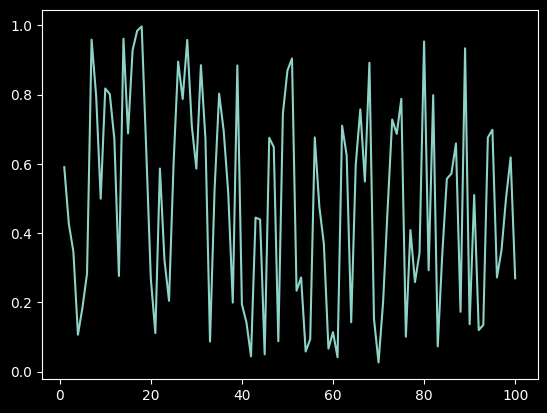

In [16]:
plt.style.use('dark_background')

plt.plot(ypoints, xpoints)
plt.show()

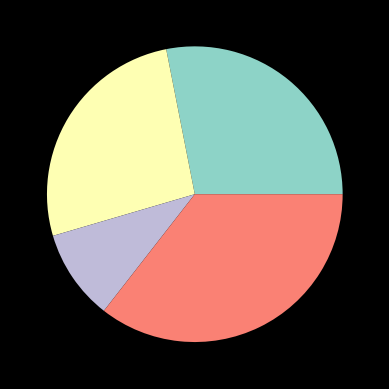

In [17]:
z = np.array([34, 32, 12, 43])
plt.pie(z)
plt.show()

In [18]:
x = np.random.normal(10, 5, 500)
x

array([10.72614796, 13.57792391, 17.33913822,  8.17833699,  8.35038101,
       13.31347969,  4.94543742,  3.46867879,  9.91063251,  9.52950092,
        9.5572785 ,  2.88309481,  5.90007006,  4.20531102, 20.8175817 ,
        7.68801111, 11.53203032,  3.91341522, -2.16946898,  5.13649913,
        8.64501851,  3.7289728 , 10.97715338, -2.78420649,  8.20147785,
       11.96345521,  9.24523072,  6.83375733,  1.55641068, 10.20061128,
        8.64563545, 13.68723085, 11.13725093,  7.23031446, 12.54094272,
        0.12801358,  2.75087484,  8.38730792,  6.6211379 , 15.14534005,
       13.70297593, 14.87534665, 17.59170818,  6.77625829,  7.34282862,
       12.22321852,  1.2025931 ,  5.28052529,  5.90684849, 13.51323983,
       12.60082914,  5.16536787,  4.02703491, 17.38408723,  7.75235492,
       15.00562365,  9.99579185, 12.13718841,  3.57264551,  7.10953727,
        6.96023149,  7.84707718,  3.8872322 , 13.76679618, 10.85002019,
        8.88652963,  6.94766782,  7.39421079, 15.78576115, 10.21

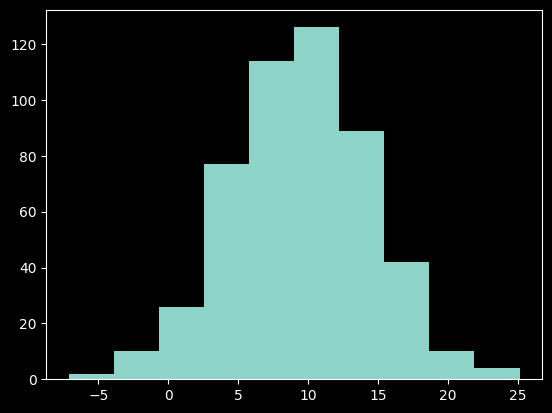

In [19]:
plt.hist(x)
plt.show()

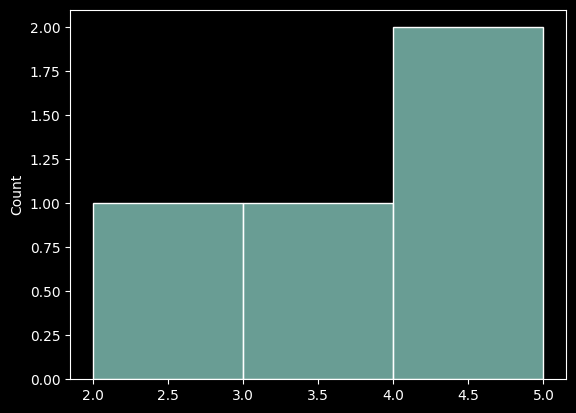

In [20]:
sns.histplot([2, 3 , 4, 5])
plt.show()

In [21]:
x = data.drop('target', axis=1)
y = data['target']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)